In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

Sig_Eqs = pd.read_table("earthquakes-2021-10-13_20-48-43_+0800.tsv")
Sig_Eqs.groupby('Country').sum().sort_values('Deaths',ascending=0)[['Deaths']].head(10)

,Deaths
Country,
CHINA,2074900.0
TURKEY,1074769.0
IRAN,1011437.0
SYRIA,439224.0
ITALY,434863.0
HAITI,323472.0
AZERBAIJAN,317219.0
JAPAN,278138.0
ARMENIA,191890.0


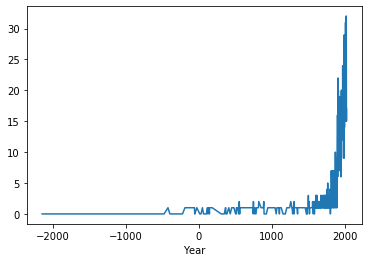

In [2]:
Sig_Eqs[Sig_Eqs['Mag']>6].groupby('Year').count()['Mo'].plot();

In [7]:
def CountEq_LargesEq(Sig_Eqs,country):
    num = Sig_Eqs.groupby('Country').count().loc[country].max()
    idx = Sig_Eqs.groupby('Country')['Mag'].idxmax()
    temp = Sig_Eqs[Sig_Eqs['Country']==country].sort_values('Mag',ascending=0)[['Year','Mo','Dy']].head(1).iloc[0]
    try:
        date = '%04d'%temp[0]+'-'+'%02d'%temp[1]+'-'+'%02d'%temp[2]
    except ValueError:
        for i in [0,1,2]:
            try:
                '%02d'%temp[i]
            except ValueError:
                temp[i] = 0
        date = '%04d'%temp[0]+'-'+'%02d'%temp[1]+'-'+'%02d'%temp[2]
    return num,date

In [11]:
Country_list = np.unique(Sig_Eqs['Country'][1:])
temp = {'Total_#':[CountEq_LargesEq(Sig_Eqs,i)[0] for i in Country_list],
        'Extreme_Date':[CountEq_LargesEq(Sig_Eqs,i)[1] for i in Country_list]}
df = pd.DataFrame(temp,index=Country_list)
print(df.sort_values('Total_#',ascending=0))

           Total_# Extreme_Date
CHINA          610   1668-07-25
JAPAN          409   2011-03-11
INDONESIA      399   2004-12-26
IRAN           380   0856-12-22
TURKEY         330   1912-08-09
...            ...          ...
NORWAY           1   1819-08-31
SUDAN            1   1993-08-01
SRI LANKA        1   1882-01-00
PALAU            1   1914-10-23
ZAMBIA           1   2017-02-24

[156 rows x 2 columns]


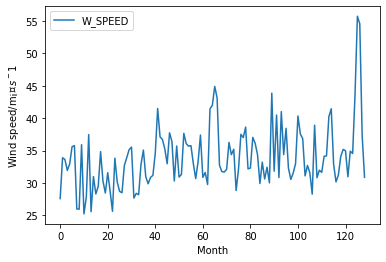

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

WDS = pd.read_csv('2281305.csv',low_memory=False)[['DATE','WND']]
WDS = pd.merge(WDS,WDS['WND'].str.split(',', expand=True),left_index=True,right_index=True)
WDS['DATE'] = pd.to_datetime(WDS['DATE'])
WDS = WDS.drop(columns=['WND',0,1,2])
WDS.columns = ['DATE','W_SPEED','SPEED_QLT']
WDS = WDS.set_index('DATE')

np.unique(WDS['W_SPEED'])
np.unique(WDS['SPEED_QLT'])
WDS = WDS[WDS['W_SPEED']!='9999']
WDS = WDS[WDS['SPEED_QLT']!='9']
WDS = WDS.astype('int')

WDS_M = WDS['W_SPEED'].resample('M').mean()
WDS_M = WDS_M.reset_index(drop=False)
WDS_M['DATE'] = WDS_M['DATE'].dt.strftime('%Y-%m')
WDS_M.set_index('DATE')
p = WDS_M.plot();
p.set_xlabel('Month');
p.set_ylabel('Wind speed/m¡¤${s^-1}$');

In [14]:
import numpy as np
import pandas as pd
import matplotlib as plt

df = pd.read_excel('Advanced Materials.xls')
df

,id,type,title,author,date,abstract
0,1,Article,Ultrathin organic films: Molecular Architectur...,"Harald Fuchs, Holger Ohst, Werner Prass",01 January 1991,Ultrathin ordered organic films with a thickne...
1,2,Article,Dopant Electromigration in Semiconductors,"David Cahen, Leonid Chernyak",29 October 2004,A doped semiconductor can be viewed as a mixed...
2,3,Article,Dielectrics for Field Effect Technology,Pieter Balk,01 August 1995,The availability of stable MOS gate systems an...
3,4,Article,Hydrogen in Semiconductors: Crystal growth and...,"Stephen Pearton, Michael Stavola, James W. Cor...",01 May 1992,The effects of unintentional hydrogen incorpor...
4,5,Article,Laser Ablation of Doped Polymer Systems,"Thomas Lippert, Akira Yabe, Alexander Wokaun",29 October 2004,Laser ablation has become a widely recognized ...
...,...,...,...,...,...,...
1783,1784,Research Article,Strong Room-Temperature Ferroelectricity in St...,"Tianyu Li, Shiqing Deng, Hui Liu, Shengdong Su...",16 April 2021,Although the discovery of exceptional ferroele...
1784,1785,Research Article,Leveraging on ENZ Metamaterials to Achieve 2D ...,"Giuseppe Emanuele Lio, Antonio Ferraro, Tizian...",30 March 2021,A novel technique is developed to improve the ...
1785,1786,Research Article,Designing Shape Morphing Behavior through Loca...,"Franziska Wenz, Ingo Schmidt, Alexander Leichn...",02 August 2021,Shape morphing implicates that a specific cond...
1786,1787,Research Article,Photonic Bandgap in Achiral Liquid Crystals—A ...,"Damian Pociecha, Nataša Vaupotič, Magdalena Ma...",16 August 2021,Achiral mesogenic molecules are shown to be ab...


In [17]:
df.sort_values('date', ascending = False)

,id,type,title,author,date,abstract
168,169,Communication,Hierarchically Nanostructured 1D Conductive Bu...,"Won Bae Ko, Da Song Choi, Choong Hyun Lee, Jun...",31 October 2017,Wearable 2D textile platforms are the subject ...
1645,1646,Research Article,Chemical Synthesis and Integration of Highly C...,"Jingying Zheng, Tingting Miao, Rui Xu, Xiaofan...",31 May 2021,Low-dimensional semiconductors provide promisi...
1702,1703,Research Article,An Efficient Narrowband Near-Infrared at 1040 ...,"Jin Hong Kim, Andreas Liess, Matthias Stolte, ...",31 May 2021,"A highly sensitive short-wave infrared (SWIR, ..."
1654,1655,Research Article,Uniform Magnesium Electrodeposition via Synerg...,"Zihao Song, Zhonghua Zhang, Aobing Du, Shanmu ...",31 May 2021,Unevenly distributed magnesium (Mg) electrodep...
1741,1742,Research Article,"Innervated, Self-Sensing Liquid Crystal Elasto...","Arda Kotikian, Javier M. Morales, Aric Lu, Joc...",31 May 2021,The programmable assembly of innervated LCE ac...
...,...,...,...,...,...,...
1673,1674,Research Article,Double- to Single-Strand Transition Induces Fo...,"Fatih N. Gür, Susanne Kempter, Florian Schuede...",01 August 2021,"The design of dynamic, reconfigurable devices ..."
1675,1676,Research Article,Cutaneous Ionogel Mechanoreceptors for Soft Ma...,"Zequn Shen, Xiangyang Zhu, Carmel Majidi, Guoy...",01 August 2021,Touch sensing has a central role in robotic gr...
693,694,Communication,Promoting Effect of Ni(OH)2 on Palladium Nanoc...,"Wenjing Huang, Xian-Yin Ma, Han Wang, Renfei F...",01 August 2017,Most electrocatalysts for the ethanol oxidatio...
2,3,Article,Dielectrics for Field Effect Technology,Pieter Balk,01 August 1995,The availability of stable MOS gate systems an...


In [31]:
df.shape

(1788, 6)

In [19]:
df['type'].unique()

array(['Article', 'Communication', 'Research Article'], dtype=object)

In [21]:
df['author'].unique()

array(['Harald Fuchs, Holger Ohst, Werner Prass',
       'David Cahen, Leonid Chernyak', 'Pieter Balk', ...,
       'Franziska Wenz, Ingo Schmidt, Alexander Leichner, Tobias Lichti, Sascha Baumann, Heiko Andrae, Christoph Eberl',
       'Damian Pociecha, Nataša Vaupotič, Magdalena Majewska, Ewan Cruickshank, Rebecca Walker, John M. D. Storey, Corrie T. Imrie, Cheng Wang, Ewa Gorecka',
       'Daqin Guan, Kaifeng Zhang, Zhiwei Hu, Xinhao Wu, Jeng-Lung Chen, Chih-Wen Pao, Yanan Guo, Wei Zhou, Zongping Shao'],
      dtype=object)

In [32]:
df.groupby('type')['id'].sum()

type
Article                  21
Communication       1230075
Research Article     369270
Name: id, dtype: int64

In [30]:
df.groupby('author')['id'].sum()[0:10]

author
Abdelsalam Ahmed, Islam Hassan, Islam M. Mosa, Esraa Elsanadidy, Mohamed Sharafeldin, James F. Rusling, Shenqiang Ren                                                                                                            492
Abhijeet K. Chaudhari, Ha Jin Kim, Intaek Han, Jin-Chong Tan                                                                                                                                                                    1278
Abhishek K. Srivastava, Wanlong Zhang, Julian Schneider, Andrey L. Rogach, Vladimir G. Chigrinov, Hoi-Sing Kwok                                                                                                                 1014
Ahmad R. Kirmani, Arif D. Sheikh, Muhammad R. Niazi, Md Azimul Haque, Mengxia Liu, F. Pelayo García de Arquer, Jixian Xu, Bin Sun, Oleksandr Voznyy, Nicola Gasparini, Derya Baran, Tom Wu, Edward H. Sargent, Aram Amassian     641
Aijun Li, Xiangbiao Liao, Hanrui Zhang, Lei Shi, Peiyu Wang, Qian Cheng, Jame